# Introductory applied machine learning (INFR10069)

# Assignment 2: Linear regression

## Important Instructions

**It is important that you follow the instructions below to the letter - we will not be responsible for incorrect marking due to non-standard practices.**

1. You *MUST* have your environment set up as in the [README](https://github.com/michael-camilleri/IAML2018) and you *must activate this environment before running this notebook*:
```
source activate py3iaml
cd [DIRECTORY CONTAINING GIT REPOSITORY]
jupyter notebook
# Navigate to this file
```

1. Read the instructions carefully, especially where asked to name variables with a specific name. Wherever you are required to produce code you should use code cells, otherwise you should use markdown cells to report results and explain answers. In most cases we indicate the nature of answer we are expecting (code/text), and also provide the code/markdown cell where to put it

1. There are some questions which are **specific to those taking the Level-11 version** of the course (INFR11182 and INFR11152). These are clearly marked with the words **(LEVEL 11)** and must be completed by those taking the Level 11 course. Those on the Level 10 version (INFR10069) may (and are advised to) attempt such questions but this will not affect their mark in any way, nor will they get feedback on them.

1. The .csv files that you will be using are located at `./datasets` (i.e. use the `datasets` directory **adjacent** to this file).

1. Keep your answers brief and concise. Most written questions can be answered with 2-3 lines of explanation.

1. Make sure to show **all** your code/working. 

1. Write readable code. While we do not expect you to follow [PEP8](https://www.python.org/dev/peps/pep-0008/) to the letter, the code should be adequately understandable, with plots/visualisations correctly labelled. **Do** use inline comments when doing something non-standard. When asked to present numerical values, make sure to represent real numbers in the appropriate precision to exemplify your answer. Marks *WILL* be deducted if the marker cannot understand your logic/results.

1. **Collaboration:** You may discuss the assignment with your colleagues, provided that the writing that you submit is entirely your own. That is, you should NOT borrow actual text or code from other students. We ask that you provide a list of the people who you've had discussions with (if any).

### SUBMISSION Mechanics

**IMPORTANT:** You must submit this assignment by **Thursday 18/10/2018 at 16:00**. 

**Late submissions:** The policy stated in the School of Informatics is that normally you will not be allowed to submit coursework late. See the [ITO webpage](http://web.inf.ed.ac.uk/infweb/student-services/ito/admin/coursework-projects/late-coursework-extension-requests) for exceptions to this, e.g. in case of serious medical illness or serious personal problems.

**Resubmission:** If you submit your file again, the previous submission is **overwritten**. We will mark the version that is in the submission folder at the deadline.

All submissions happen electronically. To submit:

1. Fill out this notebook, and save it, making sure to **KEEP the name of the file UNCHANGED**.

1. On a DICE environment, open the terminal, navigate to the location of this notebook, and submit this notebook file using the following command:

  ```submit iaml cw1 "02_LinearRegression.ipynb"```

  What actually happens in the background is that your file is placed in a folder available to markers. If you submit a file with the same name into the same location, **it will *overwrite* your previous submission**. You can check the status of your submissions with the `show_submissions` command.
  
1. **Distance Learners:** To copy your work onto DICE (so that you can use the `submit` command) you can use `scp` or `rsync` (you may need to install these yourself). You can copy files to `student.ssh.inf.ed.ac.uk`, then ssh into it in order to submit. The following is an example (replace entries in `[square brackets]` with your specific details):
```
filename="02_LinearRegression.ipynb"
local_scp_filepath=[DIRECTORY CONTAINING GIT REPOSITORY]${filename}
server_address=student.ssh.inf.ed.ac.uk
scp -r ${local_scp_filepath} [YOUR USERNAME]@${server_address}:${filename}
# rsync -rl ${local_scp_filepath} [YOUR USERNAME]@${server_address}:${filename}
ssh [YOUR USERNAME]@${server_address}
ssh student.login
submit iaml cw1 "02_LinearRegression.ipynb"
```

**N.B.: This is still Coursework 1 (cw1)**

### Marking Breakdown

The Level 10 and Level 11 points are marked out of different totals, however these are all normalised to 100%.

**70-100%** results/answer correct plus extra achievement at understanding or analysis of results. Clear explanations, evidence of creative or deeper thought will contribute to a higher grade.

**60-69%** results/answer correct or nearly correct and well explained.

**50-59%** results/answer in right direction but significant errors.

**40-49%** some evidence that the student has gained some understanding, but not answered the questions
properly.

**0-39%** serious error or slack work.

Note that while this is not a programming assignment, in questions which involve visualisation of results and/or long cold snippets, some marks may be deducted if the code is not adequately readable.

## Imports

Execute the cell below to import all packages you will be using in the rest of the assignment.

In [1]:
# Nice Formatting within Jupyter Notebook
%matplotlib inline
from IPython.display import display # Allows multiple displays from a single code-cell

# System functionality
import sys
sys.path.append('..')

# Import Here any Additional modules you use. To import utilities we provide, use something like:
#   from utils.plotter import plot_hinton

# Your Code goes here:
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, KFold, cross_val_predict
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.preprocessing import StandardScaler, MinMaxScaler, PolynomialFeatures
from scipy.stats import skew
import numpy as np

## Description of the dataset
This assignment is based on the automobile pricing dataset. Our goal will be to predict the price of automobiles based on various attributes. This data set consists of three types of entities: 

1. The specification of an automobile in terms of various characteristics 

1. Assigned insurance risk rating 
   * this rating corresponds to the degree to which the auto is more risky than its price indicates. Cars are initially assigned a risk factor symbol associated with its price. Then, if it is more risky (or less), this symbol is adjusted by moving it up (or down) the scale. Actuaries call this process ”symboling”. A value of +3 indicates that the auto is risky, -3 that it is probably pretty safe. 

1. Normalized losses in use as compared to other cars
  * the third factor is the relative average loss payment per insured vehicle year. This value is normalized for all autos within a particular size classification (two door small, station wagons, sports/speciality, etc...), and represents the average loss per car per year (avg_loss/car/year). 


To save you time and to make the problem manageable with limited computational resources, we preprocessed the original dataset. We removed any instances that had one or more missing values and randomized the data set. The resulting representation is much more compact and can be used directly to perform our experiments.


## 1. Data Visualisation

Before jumping into our problem, it is beneficial to get a feel for the data we are dealing with in the rest of the assignment.

<a id='question_1_1'></a>
### ========== Question 1.1 --- [8 marks] ==========

Load the dataset `train_auto_numeric.csv` into a pandas DataFrame called `auto_numeric`. Using any suitable pandas functionality, 
1. [Code] summarise *and*
1. [Text] comment upon

the key features of the data. Show all your code!

In [2]:
# (1) # Your Code goes here:

# Load data
data_path = os.path.join(os.getcwd(), 'datasets', 'train_auto_numeric.csv')
auto_numeric = pd.read_csv(data_path, delimiter = ',')

#To get some insights of the structure 
print("- The number of attributes is",auto_numeric.shape[1],
      ",and the size of the training data is",auto_numeric.shape[0])

#Check if there are NaN values
if auto_numeric.isnull().values.any():
    print ("NaN values!")
else:
    print("- No NaN values") 

#Check if missing values
if auto_numeric.isnull().values.any():
    print("Missing values!")
else:
    print("- No missing values")
    
display(auto_numeric.describe())
display(auto_numeric.head())

- The number of attributes is 16 ,and the size of the training data is 159
- No NaN values
- No missing values


,normalized-losses,wheel-base,length,width,height,engine-size,bore,stroke,compression-ratio,engine-power,peak-rpm,city-mpg,highway-mpg,mean-effective-pressure,torque,price
count,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000
mean,121.955975,98.559748,171.698113,65.729560,53.925157,14.056352,3.294528,3.219874,10.446855,98528.301887,5072.012579,27.113208,32.327044,46.180503,200.055031,11684.723270
std,39.434186,5.803361,12.656791,2.292021,2.410446,17.143568,0.296959,0.381833,4.414796,34123.715967,549.988239,7.848229,8.231998,28.780966,513.289289,6744.910579
min,65.000000,86.600000,141.100000,60.300000,49.400000,3.390000,2.540000,2.070000,7.000000,48000.000000,4150.000000,15.000000,18.000000,0.490000,19.400000,5118.000000
25%,93.000000,94.500000,163.400000,64.000000,52.000000,6.960000,3.050000,3.070000,8.600000,69000.000000,4800.000000,22.000000,26.500000,21.775000,34.140000,7372.000000
50%,110.000000,97.000000,171.700000,65.400000,54.100000,9.030000,3.270000,3.270000,9.000000,92000.000000,5100.000000,26.000000,32.000000,49.800000,55.900000,9233.000000
75%,145.000000,101.200000,177.800000,66.500000,55.600000,14.885000,3.580000,3.410000,9.400000,116000.000000,5450.000000,31.000000,37.000000,68.495000,119.990000,14719.500000
max,256.000000,115.600000,202.600000,71.700000,59.800000,174.160000,3.940000,4.170000,23.000000,200000.000000,6600.000000,49.000000,54.000000,99.850000,3912.870000,42056.000000


,normalized-losses,wheel-base,length,width,height,engine-size,bore,stroke,compression-ratio,engine-power,peak-rpm,city-mpg,highway-mpg,mean-effective-pressure,torque,price
0,164.0,99.8,176.6,66.2,54.3,8.85,3.19,3.4,10.0,102000.0,5500.0,24.0,30.0,40.52,57.68,13950.0
1,110.0,99.4,162.4,66.4,54.3,15.18,3.19,3.4,8.0,115000.0,5500.0,18.0,22.0,47.39,59.59,17450.0
2,158.0,105.8,192.7,71.4,51.6,15.18,3.94,2.8,8.5,70000.0,4400.0,28.0,30.0,0.85,3344.79,17710.0
3,106.0,86.6,158.7,67.7,55.9,13.74,3.13,3.5,7.8,140000.0,5600.0,32.0,20.0,44.74,68.97,23875.0
4,192.0,101.2,176.8,64.8,54.3,8.67,3.50,2.8,8.8,101000.0,5800.0,23.0,29.0,44.78,53.48,16430.0


(2) ***Your answer goes here:***

The dataset has 159 examples, and each one is described by 15 features and the price of the automobil. The quality of the data seems pretty good a priory:

- No missing values
- No NaN values

I also present the descriptive statistics of the data. A priory looks like the data set represents a wide range of prices and that does not include outliers. However, the price is skewed to the right ( there are more affordable cars than expesive cars), as we can see in the above histogram.

The first five rows of the data set are presented to get a feel of it.

### ========== Question 1.2 --- [18 marks] ==========

We will now examine the attributes in some detail. Familiarise yourself with the concept of Correlation Coefficients (start from the Lecture on Generalisation and Evaluation).

1. [Code] Analyse first the relationship between each attribute and price:
  1. Compute the correlation coefficient between each attribute and price, *and*
  1. Visualise the distribution of each attribute with price
1. [Text] Given the above, which attributes do you feel may be most useful in predicting the price? (mention at least 5). How did you reach this conclusion? *Hint: which is the more useful of the above tools?*
1. [Code] Now we will analyse the relationship between the attributes themselves. Use an appropriate pairwise visualisation tool to display graphically the relationship between each pair of attributes you selected in (2).
1. [Text] Do any attributes exhibit significant correlations between one-another? (restrict your analysis to useful attributes identified above)
1. [Text] Which attributes (give examples) would you consider removing if we wish to reduce the dimensionality of the problem and why?

The follow table contains the correlation coefficient between each attribute and price.


,Correlation feature-price,Absolute Corr
Features,,
engine-size,0.7151,0.7151
width,0.5243,0.5243
length,0.5129,0.5129
engine-power,0.4440,0.4440
highway-mpg,-0.4385,0.4385
wheel-base,0.4235,0.4235
bore,0.3652,0.3652
city-mpg,-0.3568,0.3568
height,0.1396,0.1396


The top seven are: ['engine-size' 'width' 'length' 'engine-power' 'highway-mpg' 'wheel-base'
 'bore']


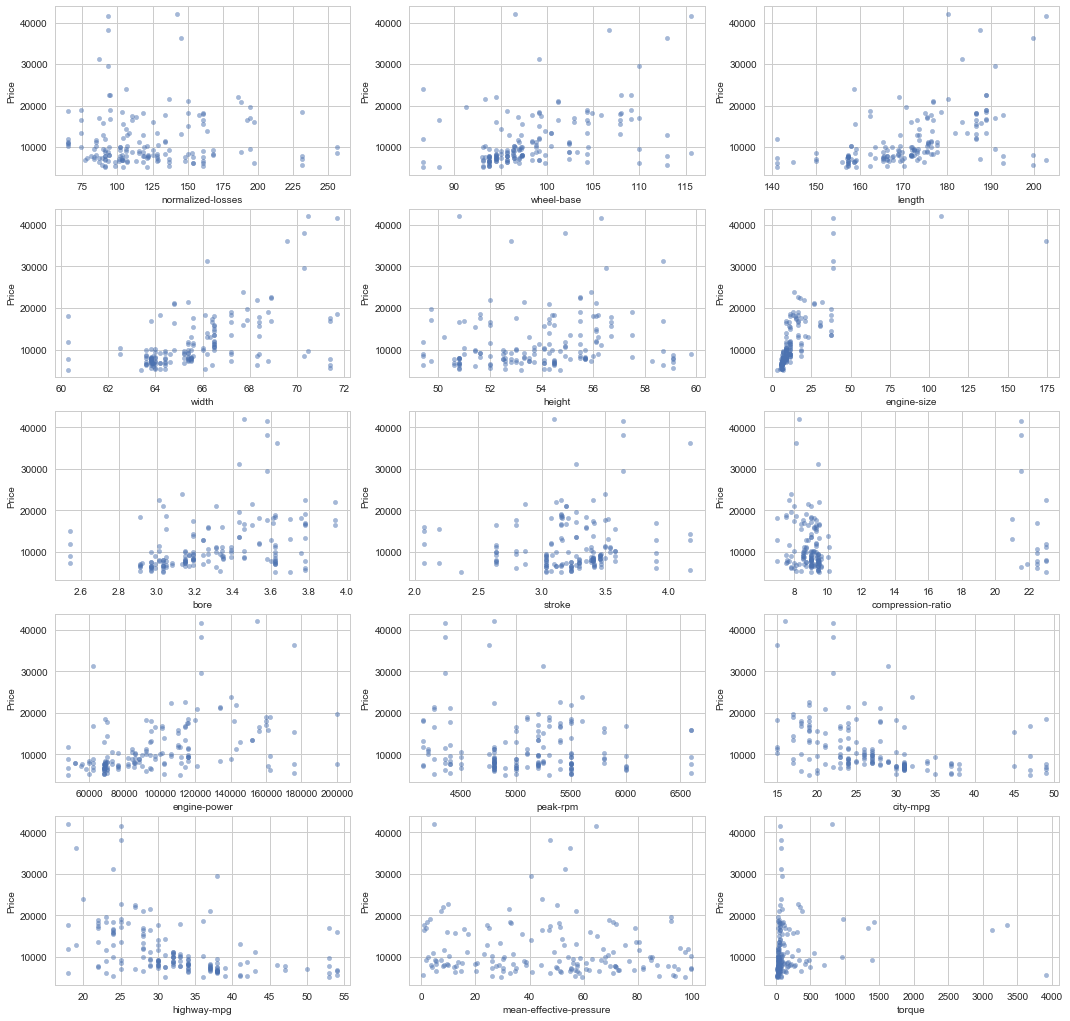

In [5]:
# (1) # Your Code goes here:

### A. Computing Correlation
############################
# Create a dictionary to store the correlations
dict_corr = {}
columns = auto_numeric.columns

#Fill dictionary with correlations
for i in columns:
    corr = auto_numeric['price'].corr(auto_numeric[i])
    dict_corr[i] = corr.round(4)

#Delete the price-price correlation
del dict_corr['price']
dict_corr

#Covert the dictionary to a dataframe for more friendly display
df_corr = pd.Series(dict_corr).to_frame()

#Set column and index name
df_corr.columns = ['Correlation feature-price']
df_corr.index.name = 'Features'
df_corr['Absolute Corr'] = (df_corr['Correlation feature-price'].abs())
top_corr = df_corr['Absolute Corr'].nlargest(7)
#Get the name of the top correlated features
list_top_features = top_corr.index.values

#Display correlations
print("The follow table contains the correlation coefficient between each attribute and price.")
display(df_corr.sort_values('Absolute Corr', ascending=False))

### B. Visualising distribution
###############################
fig, ax = plt.subplots(5,3, figsize=(18,18))

#Get list of attributes
indices = df_corr.index

i = 1

for idx in range(1,16):
    plt.subplot(5,3, idx)
    plt.scatter(auto_numeric[indices[idx-1]], 
                auto_numeric["price"],20, alpha = 0.5)
    plt.xlabel(indices[idx-1], size=10)
    plt.ylabel('Price', fontsize = 10)

print("The top seven are:",list_top_features)

(2) ***Your answer goes here:***

The 7 most effective features to predict the price are engine-size, width, length, egine-power, highway-mpg, wheel-base and bore. I made this selection based on the correlection between features and price. 

For me, a summary table displaying the correlation and absolute correlation between features and price is more usfull that a bunch of visualizations, because correlation is a number that allows me to compare within a scale. However, visualization is good to eye-ball linear regressions, e.g I can see that price-highway-mpg looks more like an inverse exponential than a linear regression.

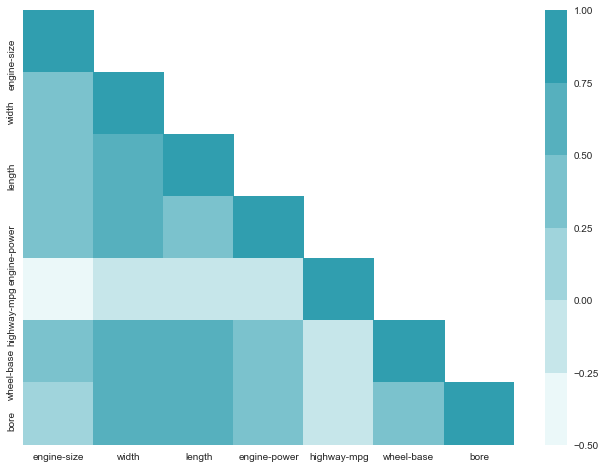

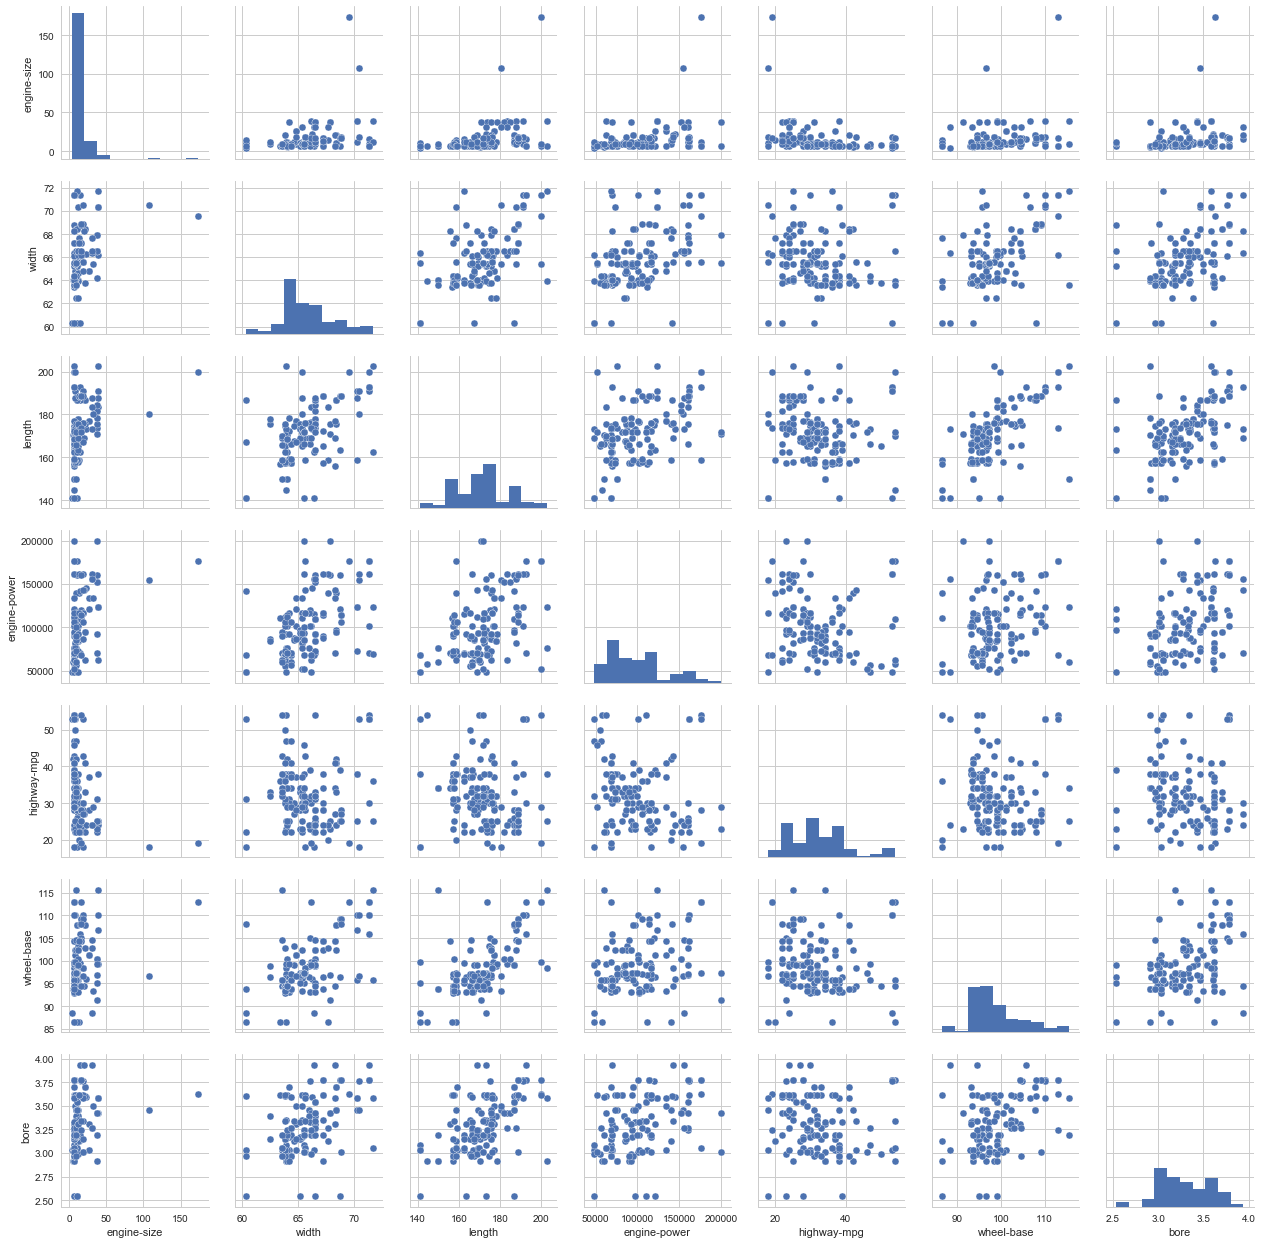

In [6]:
# (3) # Your Code goes here:

# Copy just those features we are interested in
df_corr = auto_numeric[list_top_features].copy(deep=True)

#Let's use seaborn heatmap
fig, ax = plt.subplots()
sns.set(style="whitegrid")

#Calculate correlation matrix
corr_matrix = df_corr.corr()

# Set up the matplotlib figure
fig.set_size_inches(11, 8)

#Create a mask matrix to just display down-left half correlation matrix
mask = np.zeros_like(corr_matrix)
mask[np.triu_indices_from(mask, k = 1)] = True

# Generate a color map of blues
cmap = sns.light_palette((210, 90, 60), input="husl")

#Define heatmap atributes
sns.heatmap(corr_matrix, mask=mask,cmap=cmap,
            xticklabels=corr_matrix.columns,
            yticklabels=corr_matrix.columns,
            vmin=-0.50, vmax=1)

# Plot pairwise
sns.pairplot(df_corr)

(4) #STARTHIDE#

[2 Marks] Identify at least 2 pairs which appear correlated. Some examples are: 
  * `length` and `wheel base`
  * `width` and `wheel-base`
  * `engine-power` and `length`

I ploted pairwise and a correlation matrix.

Both width and lenght are very correlated (around 0.7) to wheel-base, this is because it exist a geometric relation between wheel-base - width and lenght. Engine-power and width are also very correlated (around 0.7), this might be because high engine power cars need very wide car bonnet to fit in big motors. Indeed, these correlations can be visualized in the pairwise plot.

Also, city-mpg is correlated to highway-mpg (expected).

(5) ***Your answer goes here:***

The features I would remove are based on:

- Poor correlation with price or poor linear dependency. Based on the correlation and visualization I would remove normalized-losses, peak-rpm, torque and mean-effective-ration. However, these features may have poor correlation with price, but in combination with other features can be very powerfull. 

- Correlation between features. Linear regression assumes that there is no correlation between features, so any correlation between features can make our model weak. Thus, I would remove wheel base because it can be described geometrically in terms of width and length, and city-mpg because is very correlated to highway-mpg. 

However, based that we only have 15 features it is worth to do CV to see whether or not removing features helps.

## 2. Simple Linear Regression

When applying machine learning in practice it can be prudent to start out simple in order to get a feeling for the dataset and for any potential difficulties that might warrant a more sophisticated model. We will thus begin by studying a simple Linear Regression model. Such a model will consider the relationship between a dependent (response) variable and only one independent (explanatory) variable, which we take to be the `engine-power`.

### ========== Question 2.1 --- [5 marks] ==========

1. [Code] Produce a scatter plot of `price` against `engine-power` (label the axis). 
1. [Text] What are your thoughts about the ability of the variable to predict the price?

Text(0,0.5,'Price')

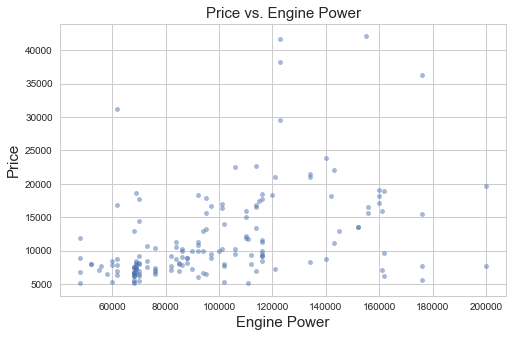

In [13]:
# (1) # Your Code goes here:

# Plot distribution
plt.figure(figsize=(8,5))
plot = plt.scatter(auto_numeric["engine-power"], 
                   auto_numeric["price"],20, alpha = 0.5)
plt.title('Price vs. Engine Power', size =15)
plt.xlabel('Engine Power', size =15)
plt.ylabel('Price', size =15)

(2) ***Your answer goes here:***

I would say that egine power is not strong enough to predict price.

It looks like there is a small positive linear correlation (linear regression assumes linear dependency) between price and engine power that could be usefull to predict prices, i.e the price increases with the engine power. However, this correlation is small and our predictions based on it would be very weak. The correlation is small because it is affected by cars with low engine power and high price, and high engine power cars with low price. I would not call these data points outliers because there could be reasonable explanations for these behaivours, for example a automobil with high engine power is cheap because it's old.

### ========== Question 2.2 --- [8 marks] ==========

1. [Code] Now visualise the distribution of the car price (again label the axes). Choose a sensible value for the number of bins in the histogram.
1. [Text] Comment on why the price variable *may not* be easy to model using linear regression, and suggest possible preprocessing to improve its applicability. At the same time, explain why it is not conclusive that it is the case at this stage. 
*N.B. There is no need to carry out the preprocessing at this stage, just comments*

Skewness:  2.23


<Figure size 1080x360 with 0 Axes>

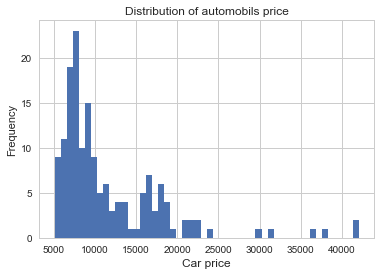

In [14]:
# (1) # Your Code goes here:

# Number of bins = 50, so the interval is 3500
plt.figure(figsize=(15,5))
auto_numeric.hist(column='price', bins =50)
plt.xlabel("Car price", size = 12)
plt.ylabel("Frequency")
plt.title("Distribution of automobils price")

print("Skewness: ", (auto_numeric['price'].skew()).round(2))

(2) ***Your answer goes here:***

The price may not be easy to predict by using a linear regression because it is skewed to the right (skewness around 2): there are more affordable cars than expesive cars. One way to have a normal distribution is applying the log to the price. There are other transformations such as sqr or x^2 as well depending on the data.

We need to check if the errors are normaly distributed before applying any transformation, because linear regression assumes normality of residuals.  There is no need to perform any transformation now because linear regression does not assume that the dependent variable is normally distributed if OLS is the function to optimize.

### ========== Question 2.3 --- [3 marks] ==========
We want to prepare our dataset for training/testing. Extract the dependent variable into a vector and the independent attribute into another. Split the dataset with 80% for training and the remaining 20% for testing, naming the resulting arrays `X_train`, `X_test`, `y_train` and `y_test`.

*Hint: you may use Scikit's `train_test_split`: set the random state to 0 for reproducibility*.

**N.B. For technical reasons, `X_train`/`X_test` must be 2D arrays: extend the dimensions of the independent attribute before splitting the dataset, such that the shape of the resulting array is (n,1) where n is the number of instances in the dataset**.

In [15]:
# Your Code goes here:

# Split X and Y and reshape X
X = auto_numeric['engine-power'].copy(deep=True)
X = np.array(X).reshape(X.shape[0],1)
y = auto_numeric['price'].copy(deep=True)

# I used the train_test_split from sklearn.model_selection
X_train, X_test, y_train, y_test = train_test_split(
         X, y, test_size=0.2, random_state=0)

### ========== Question 2.4 --- [4 marks] ==========

Decide on a simple **baseline** to predict the `price` variable. Implement it and display its parameter.

*Hint: This should be just 1 line of code + a print/display*

In [16]:
# Your Code goes here:
# Baseline method is the average of price. Like a
# linear regression with slope equal to zero
baseline_method = int(y_train.mean())
print("The baseline method predicts that the price of any automobil is: ", baseline_method)

The baseline method predicts that the price of any automobil is:  11853


<a id='question_2_5'></a>
### ========== Question 2.5 --- [7 marks] ==========
Now we want to build a simple linear regression model. We will use Scikit-learn's [`LinearRegression`](http://scikit-learn.org/0.19/modules/generated/sklearn.linear_model.LinearRegression.html) class. 
1. [Code] Train a `LinearRegression` model and report its parameters.
1. [Text] Interpret the result, and comment on what impact this has *if any* on the relevance of the `engine-power` attribute to predict the `price`.

In [17]:
# (1) # Your Code goes here:
LR = LinearRegression(normalize = False)
reg = LR.fit(X_train, y_train)
m = LR.coef_[0]
b = LR.intercept_
print("The slope is:",m.round(3),",and the intercept is",int(b))

The slope is: 0.09 ,and the intercept is 2823


(2) ***Your answer goes here:***
It may look like that the engine-power has low impact on the price because the slope is just 0.09. However, engine-power takes values from 49,000 to 200,000, and an increase of 30,000 in engine power (which is feasable) increases the price by 2,700.

### ========== Question 2.6 --- [9 marks] ==========
Now we will evaluate and compare the performance of our models on the **testing** data.
1. [Code] Produce a scatter plot of the *test-data* price data-points. Add the regression line to the plot and show the predictions on the testing set by using a different marker. Finally plot also the baseline predictor (same figure). Label your axes and provide a [legend](https://matplotlib.org/2.2.3/api/legend_api.html).
1. [Text] Just by looking at this plot, how do the two models compare?

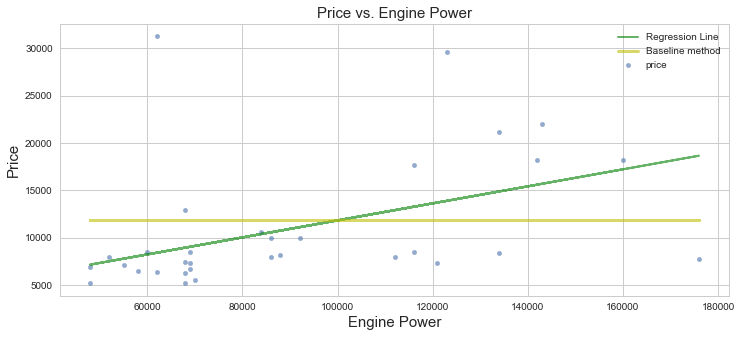

In [18]:
# (1) # Your Code goes here:
baseline = [baseline_method]*X_test.shape[0]

#Predicting using Linear Regression
y_test_pred = LR.predict(X_test)

fig = plt.figure(figsize=(12,5))

#Plot test points
plot = plt.scatter(X_test, y_test,
                   20, alpha = 0.6)

#Plot linear regression
plt.plot(X_test, y_test_pred, lw=2, c='g',
     label = 'Regression Line', alpha = 0.6)

#Plot baseline approach
plt.plot(X_test,baseline, lw=3, c='y',
       label = 'Baseline method',alpha = 0.6)

#Labels and title names
plt.xlabel('Engine Power', size =15)
plt.ylabel('Price', size =15)
plt.title('Price vs. Engine Power', size=15)
plt.legend()

(2) ***Your answer goes here:*** 

The linear regression performs better than the baseline for low values of engine power (between 40,000 and 90,000 aprox), but it does not perform very well for large values of engine power. Overall, both methods could have similar error measures because the baseline method just "tries" to predict medium-range prices, and egine power just "tries" to predict low egine power-low price and high engine-power-high price.

### ========== Question 2.7 --- [20 marks] ==========
 
You might have noticed that the above plot is not easy to interpret. 
1. [Code] Generate another plot, this time showing a histogram of the residuals under both models (label everything). 
1. [Code] Report also the Coefficient of Determination ($R^2$) and Root Mean Squared Error (RMSE) on the same **hold-out** testing set for both predictors. *Hint: Scikit Learn has functions to help in evaluating both measures.*
1. [Text] Comment on the result. *Hint: In your answer, you should discuss what the graph is showing and what the two values are measuring, and finally compare the two models under all measures/plots.*

Linear Regression skewness: 2.62
Baseline skeweness 0.52


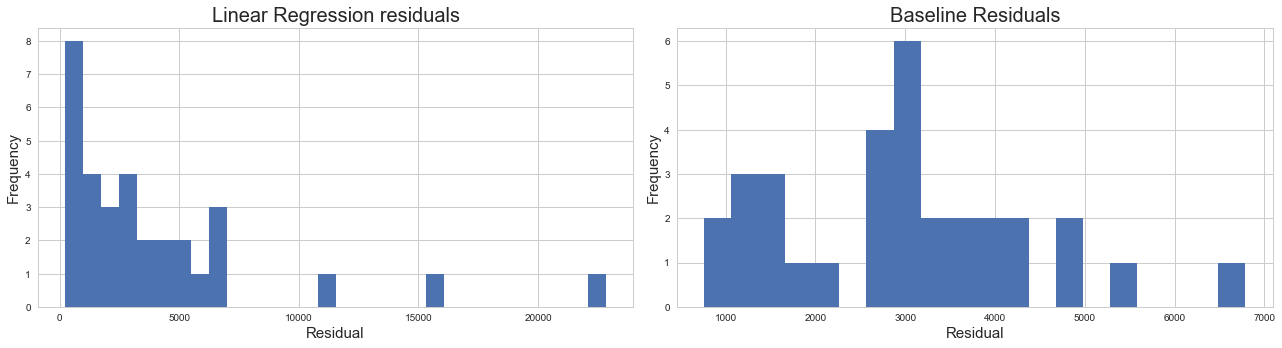

In [19]:
# (1) # Your Code goes here:

# Absolute residuals for both methods
LR_residual = np.absolute(y_test_pred - y_test)
Bas_residual = np.absolute(y_test_pred - baseline)

# Preparing data for subplot 
residuals = [LR_residual, Bas_residual]
titles = ['Linear Regression residuals', 'Baseline Residuals']
bins = [30,20]

# Plot both residuals
fig, axs = plt.subplots(1,2, figsize=(18,5))
axs = axs.ravel()
for idx,ax in enumerate(axs):
    ax.hist(residuals[idx], bins=bins[idx])
    ax.set_title(titles[idx], size=20)
    ax.set_xlabel('Residual',fontsize = 15)
    ax.set_ylabel('Frequency', fontsize = 15)

plt.tight_layout()
print("Linear Regression skewness:" , (LR_residual.skew()).round(2))
print("Baseline skeweness %.2f" % (skew(Bas_residual)))

In [20]:
# (2) # Your Code goes here:

indexs = ['Linear Regression','Baseline approach']
columns = ['R2 score', 'RMSE']

predictions = [y_test_pred, baseline]

data = [((r2_score(y_test,predictions[i])).round(2),
       int(np.sqrt(mean_squared_error(predictions[i],y_test)))) 
       for i in range(2)]

df_report = pd.DataFrame(index=indexs, columns=columns, data = data)
display(df_report)

,R2 score,RMSE
Linear Regression,0.17,6153
Baseline approach,-0.02,6800


(3) ***Your answer goes here:***

I will discuss which method performs better and whether of not the method is good for our data:

- In terms of performance (RMSE measures how close a fitted line is to the data points), the linear regression is better than the baseline because the RSME of the linear regression is lower than the one of the baseline method. The baseline method R2 score is aprox. 0, this means that the model cannot explain the varience of the indepdent variable, while linear regression R2 is greater than 0 but very poor.  

- The baseline residuals look more like to those of a "good" linear regression (it reminds a normal distribution). Whereas the linear regression residuals indicates that linear regression is not a good model for this data (as it is, but we can apply transformations) because the residuals are skewed to the right ( skewness >> 0), and linear regression assumes normal distribution on the residuals.

<a id='question_2_8'></a>
### ========== Question 2.8 --- [9 marks] ==========

So far we have used a hold-out test set for validation.

1. [Text] What are the repurcussions of this for interpreting the above results?

1. [Code] To solve this problem, we will use k-fold cross-validation to evaluate the performance of the regression model. By using Scikit-learn's [`KFold`](http://scikit-learn.org/0.19/modules/generated/sklearn.model_selection.KFold.html) class construct a 5-fold cross-validation object. Set `shuffle=True` and `random_state=0`. ***[Optional]*** *You may wish to visualise the training/validation indices per fold. The `split` method comes in handy in this case.*

  **N.B. You will use this KFold instance you are about to create throughout most of the remainder of this Assignment - keep track of it!**

1. [Code] Then train a new Linear Regression Model using the [`cross_val_predict`](http://scikit-learn.org/0.19/modules/generated/sklearn.model_selection.cross_val_predict.html) function. Report the Coefficient of Determination ($R^2$) and Root Mean Squared Error (RMSE).

1. [Text] Relate these to the previous results.



(1) ***Your answer goes here:***

The problem with hold-out is that we are not using all the data to train our model, and thus we are loosing learning power. Moreover, in this problem we do not have a big amount of data, so to build a robust model we would need to use as much data as we can. That is why kfold can help on this. Boostraping can also help, but it is out of the scope.

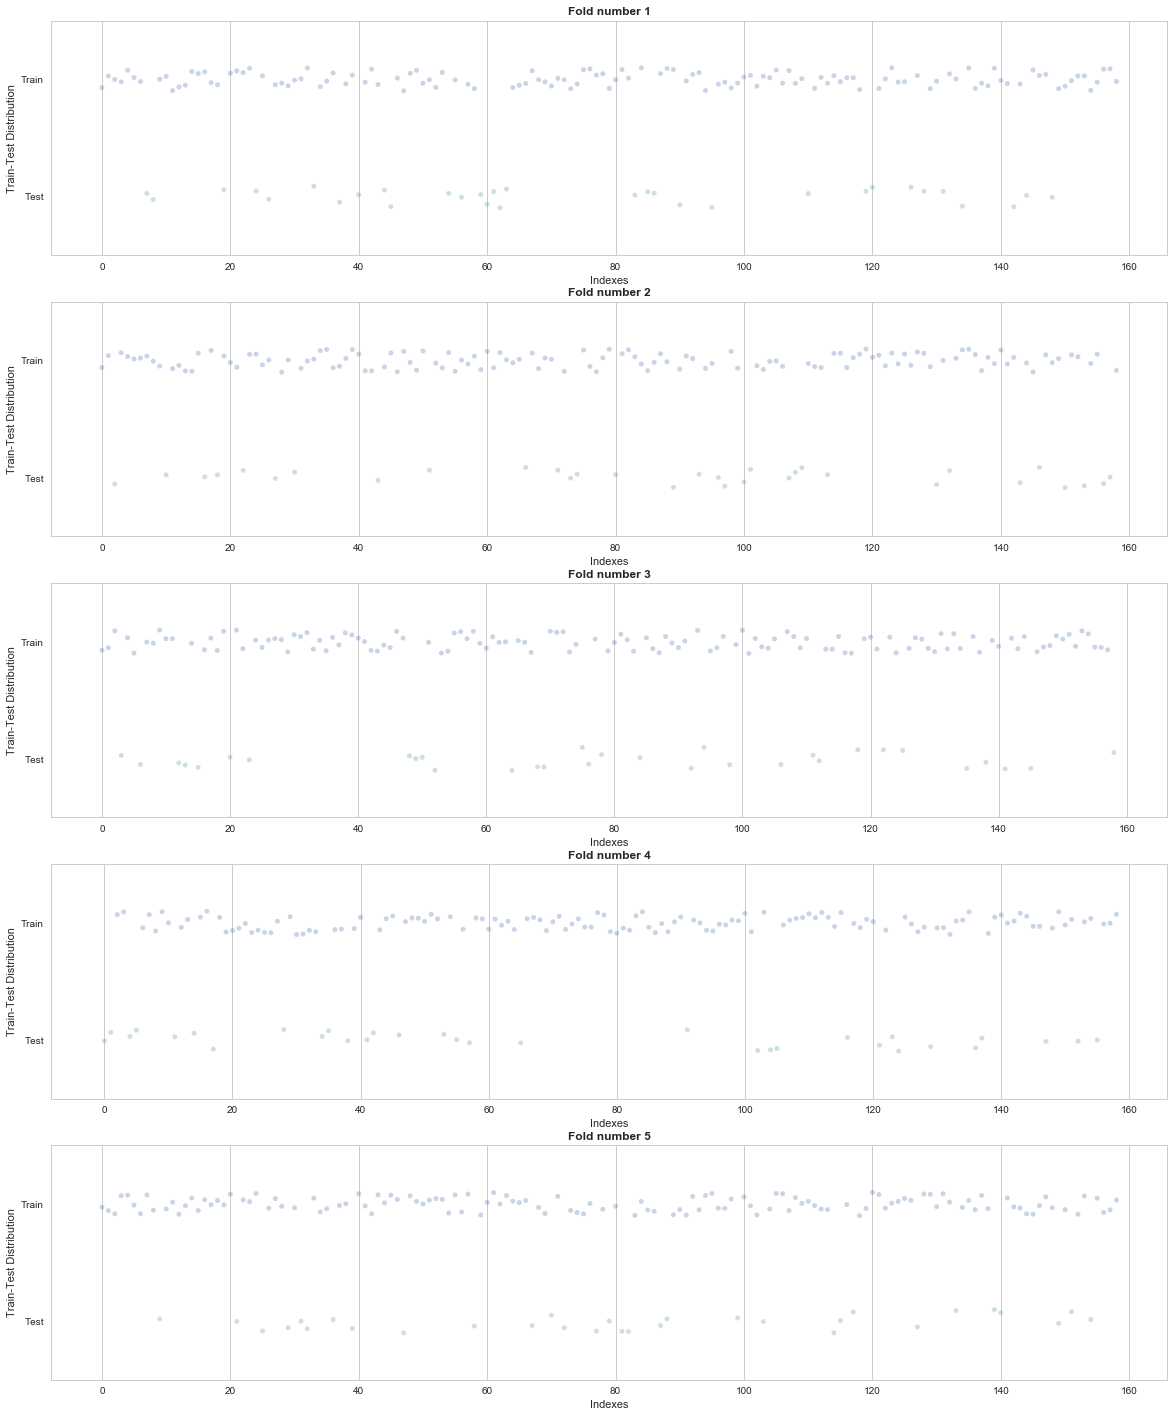

In [21]:
# (2) # Your Code goes here:

# Kfold with 5 folds
kfold = KFold(5, shuffle=True, random_state=0)

train_dict = {}
test_dict = {}
total = {}

f, axes = plt.subplots(5, 1,figsize=(20,25))

#Just checking train_index (test_index are the same)
i = 0
for train_index, test_index in kfold.split(X):
    X_train, X_test = X[train_index], X[test_index]
    
    # Let's visualize the folds
    # Store in dictionary keys: indices - values: Test or Train
    train = ["Train"]*X_train.shape[0]
    test = ["Test"]*X_test.shape[0]
    train_dict = dict(zip(train_index, train))
    test_dict = dict(zip(test_index, test))
    total = dict(train_dict)
    total.update(test_dict)
    
    #Safe to pandas
    df = pd.DataFrame(list(total.items()), columns=['Indexes', 'Train/Test'])    
    
    # Plotting
    sns.stripplot(x="Indexes", y=df["Train/Test"],
                  data=df,jitter =True,
                  alpha=.3, ax=axes[i])
    
    #Set title and axes label
    axes[i].set_xlabel('Indexes')
    axes[i].set_ylabel('Train-Test Distribution')
    axes[i].set_title('Fold number '+str(i+1),fontweight="bold")
    i += 1


In [22]:
# (3) # Your Code goes here:

y_cv = cross_val_predict(LR, X, y, cv=kfold)
print("R2 score: ", (r2_score(y,y_cv)).round(2))
print("RMSE: ", int(np.sqrt(mean_squared_error(y,y_cv))))

R2 score:  0.17
RMSE:  6114


(4) ***Your answer goes here:*** 

The results implie that in this case kfold is usefull to tune the parameters to fit a better model because RMSE decreased, but R2 score doesn't improve because a linear regression that takes engine-power as the independent variable cannot properly explain the variance of the price. Mainly because the relation between price and engine-power is not linear.

### ========== Question 2.9 --- (LEVEL 11) --- [18 marks] ==========

1. [Code] Load the new dataset `train_auto_base.csv` into a pandas DataFrame `auto_base`. Again by using the `engine-power` attribute as predictor and `price` as target variable build a LinearRegression model on this dataset. Report the $R^2$ and RMSE metrics for this model (on testing set). 

1. [Code/Text] You should notice a significant change in performance. Where is this coming from? Use visualisation/analysis methods you have learnt to answer this question. Document your code and describe your analysis (via inline comments) as you progress. Your written answer should be just a short paragraph (1-3 sentences) describing your conclusion.

*Hint: you may find it easier to understand what is happening if you use a hold-out test-set rather than cross-validation in this case. Also, make use of pandas methods to help you.*

In [23]:
# (1) # Your Code goes here:

# Loading data
data_path = os.path.join(os.getcwd(), 'datasets', 'train_auto_base.csv')
auto_base = pd.read_csv(data_path, delimiter = ',')

# Number of features and data points
print("Number of features: ",auto_base.shape[1],", number of data points: ", auto_base.shape[0])

# Split X and y
y_autoBase = auto_base["price"].copy(deep = True)
X_autoBase = auto_base["engine-power"].copy(deep = True)
X_autoBase = np.array(X_autoBase).reshape(X_autoBase.shape[0],1)

# Used 80-20% hold-out for recommendation
X_AB_train, X_AB_test, y_AB_train, y_AB_test = train_test_split(
         X_autoBase, y_autoBase, test_size=0.2, random_state=0)

# Linear regression
LR_AB = LinearRegression(normalize = False)

# Fiting linear regression
reg_AB = LR_AB.fit(X_AB_train, y_AB_train)

# Predicting
y_AB_pred = LR_AB.predict(X_AB_test)

# Printing R2 and RMSE
print("R2: ", (r2_score(y_AB_test, y_AB_pred)).round(2))
print("RMSE: ", int(np.sqrt(mean_squared_error(y_AB_test, y_AB_pred))))

Number of features:  2 , number of data points:  159
R2:  -0.02
RMSE:  6800


Engine power values: [1.]
Slope: 0.0898838874386661 Intercept: 2823


,engine-power,price
0,1.0,13950.0
1,1.0,17450.0
2,1.0,17710.0
3,1.0,23875.0
4,1.0,16430.0


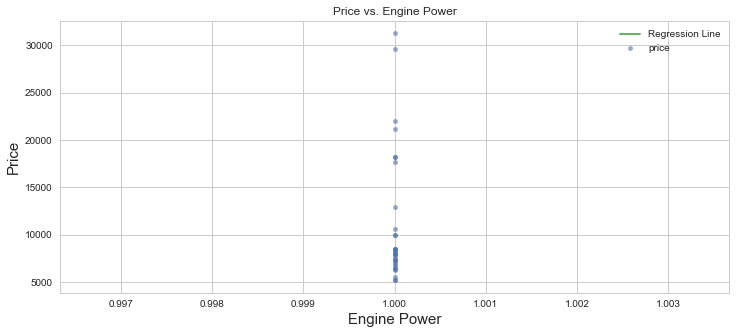

In [24]:
# (2) Show any working code here...
# Your Code goes here:

# Different valyes of engine-power
engine_power_values = auto_base["engine-power"].unique()

# Print engine power values
print("Engine power values:",engine_power_values)

# Let's plot the linear regression
fig = plt.figure(figsize=(12,5))

#Plot test points
plot = plt.scatter(X_AB_test, y_AB_test,
                   20, alpha = 0.6)

#Plot linear regression
plt.plot(X_AB_test, y_AB_pred, lw=2, c='g',
     label = 'Regression Line', alpha = 0.6)

#Labels and title names
plt.xlabel('Engine Power', size =15)
plt.ylabel('Price', size =15)
plt.title('Price vs. Engine Power')
plt.legend()

print("Slope:",LR.coef_[0],"Intercept:",int(LR.intercept_))

display(auto_base.head(5))

(2) - Final Conclusion(s)
***Your answer goes here:***

The performance has decreased: RMSE has increased and R2 scores is close to zero, which means that the model is an horizontal line (Indeed it is because the slope is 0). These results are the same as in the baseline method, that is because engine-power just takes a single values an the algorithms outputs the same price for any given engine-power value.

## 3. Multivariate Linear Regression
In this Section we will fit a Multivariate Linear Regression model (still using [`LinearRegression`](http://scikit-learn.org/0.19/modules/generated/sklearn.linear_model.LinearRegression.html)) to the dataset: i.e. we will now train a model with **multiple** explanatory variables and ascertain how they affect our ability to predict the retail price of a car. 

**N.B. We will use the *KFold* instance you created in [Question 2.8](#question_2_8) to train & validate our models.**

### ========== Question 3.1 --- [6 marks] ==========

1. [Code] Train a Multi-Variate `LinearRegression` model on the original `auto_numeric` dataframe you loaded in [Question 1.1](#question_1_1), and evaluate it using the *KFold* instance you created in [Question 2.8](#question_2_8) (report RMSE and $R^2$). 
1. [Text] Comment on the result, and compare with the univariate linear regression model we trained previously ([Question 2.5](#question_2_5)).

In [25]:
# (1) # Your Code goes here:

# Segretate X and y from auto_numeric
LR_multi = LinearRegression(normalize = False)
X_multi = auto_numeric.copy(deep = True)
X_multi.drop( columns = 'price', inplace = True)
y_multi = auto_numeric['price'].copy(deep=True)

# Using cross_val_predict with defined kfold
y_multi_pred = cross_val_predict(LR_multi, X_multi, y_multi, cv=kfold)

# 
print("R2 score multivariate linear regression: ", (r2_score(y_multi, y_multi_pred)).round(2))
print("RMSE multivariate linear regression: ", int(np.sqrt(mean_squared_error(y_multi, y_multi_pred))))

R2 score multivariate linear regression:  0.49
RMSE multivariate linear regression:  4819


(2) ***Your answer goes here:***



The multivariate regression is a better fit than the linear regression on engine-power because the RMSE decreased and R2 score increased considerably. This means that this method gives a better parameter estimation, and that all the features can explain better the variance of the price.

### ========== Question 3.2 --- [4 marks] ==========

1. [Code] Examine the scatter plot of `engine-size` vs `price` again (plot again below)
1. [Text] Why might this cause a problem for linear regression? 

Skewness: 6.44


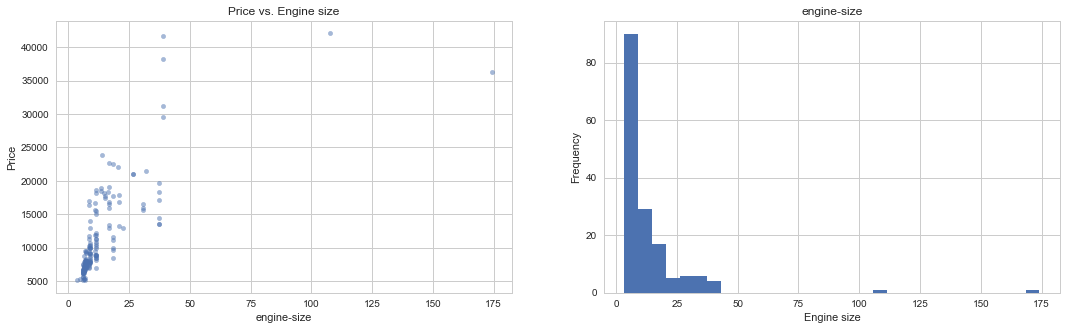

In [95]:
# (1) #STARTHIDE#
# [2 Marks] - Plot histogram with labels


def engine_size_plots(df, bins = 30, log = False):
    '''Scatter plot and histogram for engine-size'''
    
    column_name = 'engine-size-log' if log else 'engine-size'
    fig, ax = plt.subplots(1,2, figsize=(18,5))

    # Plot scatter 
    plt.subplot(1,2,1)
    plt.scatter(df[column_name], 
                df["price"],20, alpha = 0.5)
    plt.xlabel(column_name)
    plt.ylabel('Price')
    plt.title('Price vs. Engine size')

    # Plot histogram
    plt.subplot(1,2,2)
    plt.hist(df[column_name], bins = bins)
    plt.xlabel('Engine size')
    plt.ylabel('Frequency')
    plt.title(column_name)
    
engine_size_plots(auto_numeric)

print("Skewness:", (auto_numeric['engine-size'].skew()).round(2))

(2) ***Your answer goes here:***

The engine-size might cause a problem on the linear regression because the relationship between price and engine-size does not look very linear, and engine-size is strongly skewed to the right ( Skewness around 6). 

<a id='question_3_3'></a>
### ========== Question 3.3 --- [10 marks] ==========
In class we discussed ways of preprocessing features to improve performance in such cases.
1. [Code] Transform the `engine-size` attribute using an appropriate technique from the lectures (document it in your code) and show the transformed data (scatter plot).
1. [Code] Then retrain a LinearRegression Model and report $R^2$ and RMSE. 
1. [Text] How has the performance of the model changed when compared to the previous result? and why so significantly?

Skewness: 1.49


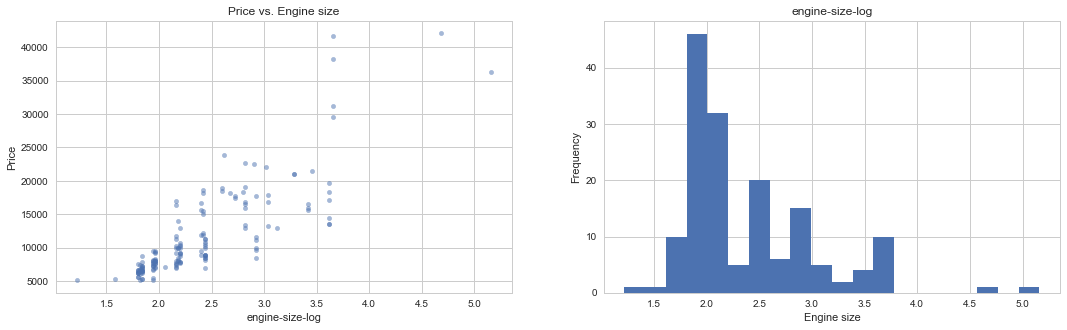

In [27]:
# (1) # Your Code goes here:

# I use the log transformation to deal with the skewness
# I create a new column to avoid overwritting
auto_numeric['engine-size-log'] = np.log(auto_numeric['engine-size'])
engine_size_plots(auto_numeric, bins = 20, log = True)

print("Skewness:", (auto_numeric['engine-size-log'].skew()).round(2))

In [28]:
# (2) # Your Code goes here:

LR_multi = LinearRegression(normalize = False)
X_multi_log = auto_numeric.copy(deep = True)
X_multi_log.drop( columns = ['price','engine-size'], inplace = True)
y_multi = auto_numeric['price'].copy(deep=True)

y_multi_pred_log = cross_val_predict(LR_multi, X_multi_log, y_multi, cv=kfold)

print("R2 score multivariate linear regression: ", (r2_score(y_multi, y_multi_pred_log)).round(2))
print("RMSE multivariate linear regression: ", int(np.sqrt(mean_squared_error(y_multi, y_multi_pred_log))))

R2 score multivariate linear regression:  0.69
RMSE multivariate linear regression:  3745


***Your answer goes here:***

The performance of our model increased because the RMSE deacreased and R2 score increased, so this transformation helps to fit a better regression and explains better the price variance. 

It improved because after the log-transofmration engine-size, the relationship between price and engine-size looks more linear and engine-size is less skewed.

### ========== Question 3.4 --- (LEVEL 11) --- [12 marks] ==========

The simplicity of Linear Regression allows us to interpret the importance of certain features in predicting target variables. However this is not as straightforward as just reading off the coefficients of each of the attributes and ranking them in order of magnitude.

1. [Text] Why is this? How can we *linearly* preprocess the attributes to allow for a comparison? Justify your answer.
1. [Code] Perform the preprocessing you just mentioned on the transformed data-set from [Question 3.3](#question_3_3), retrain the Linear-Regressor and report the coefficients in a readable manner. *Tip: To simplify matters, you may abuse standard practice and train the model once on the entire data-set with no validation/test set.*
1. [Text] Which are the three (3) most important features for predicting price under this model?

(1) ***Your answer goes here:***

Because each feature is in different units, so it is like comparing different things. We need to normalize the data if we want to compare the features. The normalization process ranges all the values between 0 and 1 applying a linear transformation:

\begin{align}
z_i = 
\frac{x_i - min(x)}
{{max(x) - min(x)}}
\end{align}

As shown above, normalization is a linear process.

In [29]:
# (2) # Your Code goes here:

# I used MinMaxScaler from sklearn
# to normalize the data
columns = auto_numeric.columns
min_max_scaler = MinMaxScaler()
np_scaled = min_max_scaler.fit_transform(auto_numeric)
auto_numeric_normalized = pd.DataFrame(np_scaled, columns = columns)

# Display data to confirm normalization
print("\033[1m Displaying some data points to ensure normalization")
display(auto_numeric_normalized.head(5))

# Apply LinearRegression to normalized data
LR_norm = LinearRegression()
X_norm_log = auto_numeric_normalized.copy(deep = True)

# Segretatin X and y
X_norm_log.drop( columns = ['price','engine-size'], inplace = True)
y_multi = auto_numeric['price'].copy(deep=True)


# Not using any validation method
reg_norm = LR_norm.fit(X_norm_log, y_multi)

# Need to fit X values to get coeficients
y_norm_log = LR_norm.predict(X_norm_log)

# Getting coeficients
m = reg_norm.coef_
# I convert them to int for easy visualization
m = m.astype(int)

# Code to present coeficients in a nice dataframe
coef_dict = dict(zip(X_norm_log.columns, m))
df_coef = pd.Series(coef_dict).to_frame()
df_coef.columns = ['Coeficients']
df_coef.index.name = 'Features'
# Create a column with the absolute value of the coeficients
df_coef['Coeficients abs'] = np.absolute(df_coef['Coeficients'])
print("\033[1m \nCoeficients summary table")
display(df_coef.sort_values('Coeficients abs', ascending=False))

 Displaying some data points to ensure normalization


,normalized-losses,wheel-base,length,width,height,engine-size,bore,stroke,compression-ratio,engine-power,peak-rpm,city-mpg,highway-mpg,mean-effective-pressure,torque,price,engine-size-log
0,0.518325,0.455172,0.577236,0.517544,0.471154,0.031973,0.464286,0.633333,0.18750,0.355263,0.551020,0.264706,0.333333,0.402878,0.009832,0.239103,0.243603
1,0.235602,0.441379,0.346341,0.535088,0.471154,0.069040,0.464286,0.633333,0.06250,0.440789,0.551020,0.088235,0.111111,0.472021,0.010322,0.333857,0.380577
2,0.486911,0.662069,0.839024,0.973684,0.211538,0.069040,1.000000,0.347619,0.09375,0.144737,0.102041,0.382353,0.333333,0.003623,0.854094,0.340896,0.380577
3,0.214660,0.000000,0.286179,0.649123,0.625000,0.060608,0.421429,0.680952,0.05000,0.605263,0.591837,0.500000,0.055556,0.445350,0.012732,0.507797,0.355275
4,0.664921,0.503448,0.580488,0.394737,0.471154,0.030919,0.685714,0.347619,0.11250,0.348684,0.673469,0.235294,0.305556,0.445753,0.008753,0.306243,0.238387


 
Coeficients summary table


,Coeficients,Coeficients abs
Features,,
engine-size-log,33073,33073
width,6892,6892
highway-mpg,-6140,6140
stroke,-4234,4234
peak-rpm,3193,3193
compression-ratio,2826,2826
city-mpg,2674,2674
engine-power,-2425,2425
bore,-2053,2053


(3) ***Your answer goes here:***

The three most important features are engine-size (with log transformation), width and highway-mpg. This results agrees with the correlation table presented at ***Q.1.2*** that shows that these features are very correlated to price.

### ========== Question 3.5 --- (LEVEL 11) --- [10 marks] ==========

In the lectures we discussed another form of extension to the basic linear-regression model: the introduction of basis functions. This method attempts to capture non-linearities in the input-output mapping.

1. [Text] How would you choose the features to test higher-orders on? And how would you choose the best polynomial order for these features?
1. [Code] Load the csv file `train_auto_nonlinear.csv` into a new dataframe (this is a standard version of the transformed data-set from [Question 3.3](#question_3_3)). Add a second-order basis to the two attributes `length` and `engine-power` and train a new LinearRegression model. Report the $R^2$ and RMSE performance.
1. [Text] Comment on the result in relation to those in [Question 3.3](#question_3_3).

(1) ***Your answer goes here:***

I would look at the plots of ***Q.1.2*** and eyeball non-linear relations between price and the features (in this case high-orders). In this specific data set, we can see that price varies exponentially on length:


\begin{align}
price  \propto {length}^2
\end{align}

Another example, is to apply other transformations. For example, eyeballing price and city-mpg:

\begin{align}
price \propto  \frac{1}{city-mpg}
\end{align}

And for the shape, eyeballing price and engine-size:

\begin{align}
price  \propto engine-power + {engine-power}^2 + {engine-power}^3 + O(4)
\end{align}


Then, I would apply the transformation, make a scatter plot of price and that feature, and finally I would fit a linear regression and check if there is any improvement on the results. As far as I know, there is no "rule" to select high-order polynomials, it is all based on empirical trials and then you select your best model conseidering time-space complexity and the bias-variance trade off (because high-order polynomials tend to overfit).

In [93]:
# (2) # Your Code goes here:

# Load data
data_path = os.path.join(os.getcwd(), 'datasets', 'train_auto_nonlinear.csv')
df_non_linear = pd.read_csv(data_path, delimiter = ',')

# Apply second order basis transformation
poly = PolynomialFeatures(2)
transf = df_non_linear[['length','engine-power']]
transf = poly.fit_transform(transf, False)

# Convert to pandas and remove bias
transf = pd.DataFrame(transf) 
transf.drop(transf.columns[0], axis=1, inplace = True)

# Concatenate data and applied transformation
df_non_linear = pd.concat([df_non_linear,transf], axis=1, sort=False)

# Remove length and engine-power columns because they are dupplicated
df_non_linear.drop(columns = ['length','engine-power'], inplace = True)

# Define LinearRegression
LR_poly = LinearRegression()

# Segretating X and y
X_poly = df_non_linear.copy(deep = True)
X_poly.drop( columns = ['price'], inplace = True)
y_poly = df_non_linear['price'].copy(deep=True)

lr_poly = LR_poly.fit(X_poly, y_poly)
y_poly_pred = LR_poly.predict(X_poly)

y_poly_pred_2 = cross_val_predict(LR_poly,X_poly, y_poly, cv=kfold)

print("R2 score multivariate linear regression: ", (r2_score(y_poly, y_poly_pred)).round(2))
print("RMSE multivariate linear regression: ", int(np.sqrt(mean_squared_error(y_poly, y_poly_pred))))
                                  
print("R2 score multivariate linear regression using cross-validation: ", (r2_score(y_poly, y_poly_pred_2)).round(2))
print("RMSE multivariate linear regression using cross-validation: ", int(np.sqrt(mean_squared_error(y_poly, y_poly_pred_2))))                                 

R2 score multivariate linear regression:  0.77
RMSE multivariate linear regression:  3206
R2 score multivariate linear regression using cross-validation:  0.66
RMSE multivariate linear regression using cross-validation:  3897


(3) ***Your answer goes here:***

We get better results if we use all the training data to build the model and then test on it. However, the improvement on the results might be because the model is overfitting the training data (higher polynomial orders increase variance and reduce bias). Probably, L1 and L2 can be used to reduce variance.

Indeed, if we use cross-validation, we see that we get very similar results to those of Q.3.3 (slightly worse).  

Maybe we need to apply other transformations, looking at the visualizations I would suggest:

For length, I would apply an exponential transformation:

\begin{align}
price  \propto e^{length}
\end{align}

For engine-size, I'd go to higher polynomial orderds:

\begin{align}
price  \propto engine-power + {engine-power}^2 + {engine-power}^3 + O(4)
\end{align}